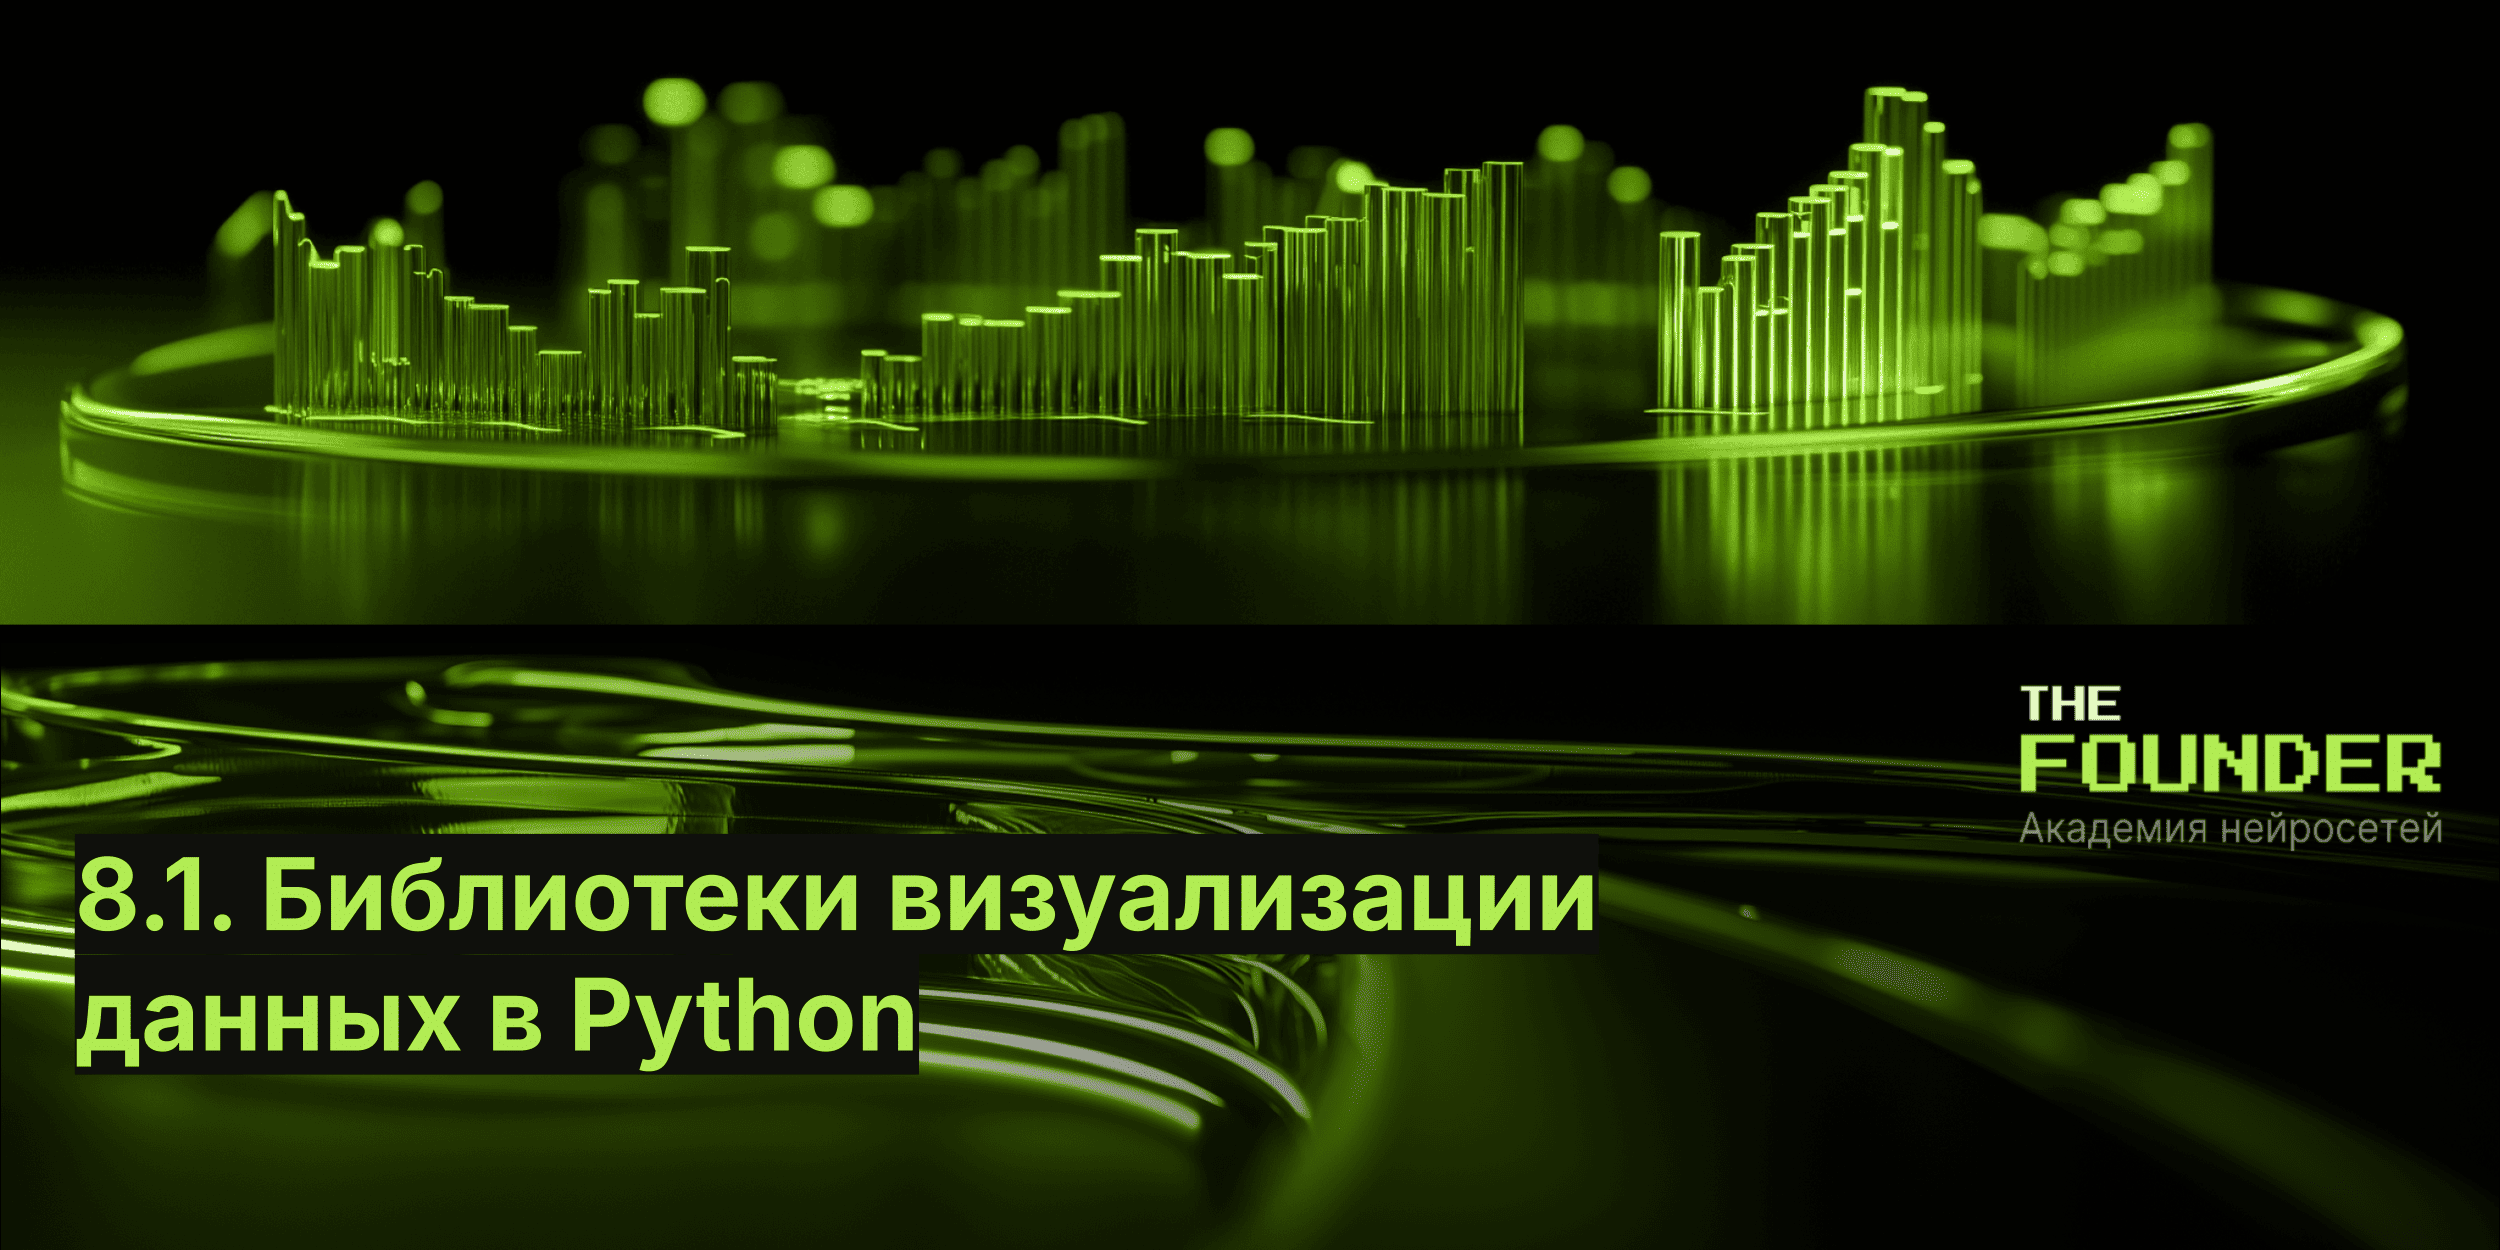

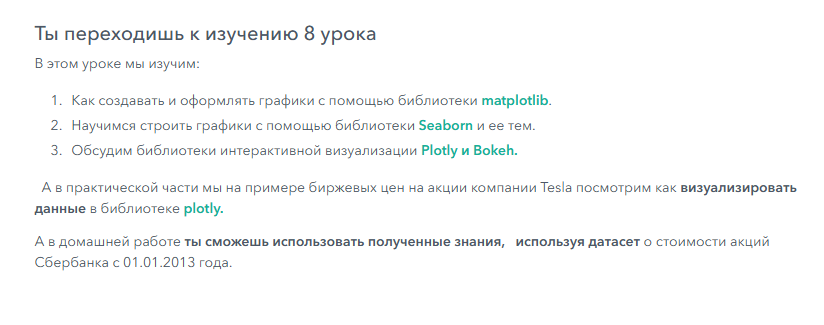

**Навигация по уроку**

1. [Библиотеки визуализации данных в Python](https://colab.research.google.com/drive/1nQ6UGFhW95AMmkZScHWOl63E5Z5-5RQs#scrollTo=O0dFTIuYGKI4)
2. [Задача об акциях Tesla](https://colab.research.google.com/drive/1jukOs54u301WtyQS-SbRxWxDstTCjEBq)
3. [Домашняя работа](https://colab.research.google.com/drive/1ZPDzV8gGLA9gHk3-i6lOFE8aeltErNKW)

**В данном уроке мы изучим:**

1.  Как создавать и оформлять графики с помощью библиотеки matplotlib.
2.  Научимся строить графики с помощью библиотеки Seaborn и ее тем.
3.  Обсудим библиотеки интерактивной визуализации Plotly и Bokeh.

Визуализация данных важна для их изучения и представления. Выражение **«картина стоит тысячи слов»** применимо и к пониманию данных. Из визуализаций часто можно получить информацию, которая не очевидна из голой статистики.

Как правило, данные проще объяснить, опираясь на их визуальное отображение.
Любая информация становится более очевидной и информативной, если ее наполнить таблицами, графиками и диаграммами. К счастью, в Python есть достаточное число библиотек для визуализации. Рассмотрим основные из них.

##  Библиотека Matplotlib

**Matplotlib** — это базовый инструмент для создания графиков. Он широко применяется сам по себе и в качестве основы для других библиотек построения графиков. Он — часть экосистемы **SciPy**, наряду с **NumPy** и **Pandas**.

Есть много интерфейсов для применения matplotlib. Один из них — pylab, который
обычно импортируется так:
```
from matplotlib.pylab import *
```
Он считается устаревшим и нерекомендуемым. И приводится в качестве примера, чтобы показать, что не одним pyplot единым славится matplotlib. На самом деле он остался в библиотеке для совместимости с "устаревшим" кодом. И если он вам встретиться, то должны понимать, что он писался во времена, когда доллар был по 32, в Челябинске упал метеорит, а с пиратством только-только начинали бороться.

Главный минус устаревшего интерфейса - то, что он импортирует все функции из **matplotlib.pyplot**, **numpy**, **numpy.fft**, **numpy.linalg** и **numpy.random**, а также некоторые дополнительные функции в глобальное пространство имен. Импортировать все то, что вы не планируете использовать - это плохая практика. Вместо этого предлагается импортировать только то, что вы собираетесь использовать.

Рекомендованный интерфейс для matplotlib — **pyplot**, которому, по соглашению между программистами, для удобства использования присваивают псевдоним **plt**:
```
import matplotlib.pyplot as plt
```
С помощью ключевого слова **as**, мы можем присвоить любому импортируемому объекту псевдоним и обращаться к нему по псевдониму. Раз договорились программисты иcпользовать **plt**, то так и будем делать.

Чтобы графики отображались в ячейке Google Colab или в блокноте Python Jupyter, необходимо добавить магическую команду:

```
%matplotlib inline
```

Цитата из документации:
>«Благодаря этому бэкэнду вывод команд построения графика отображается во внешних интерфейсах, таких как блокнот Jupyter , непосредственно под ячейкой кода, которая его создала. Полученные графики также будут сохранены в документе записной книжки».

Два основных понятия в matplotlib — это фигуры и оси. Первые используются
для отображения данных в виде графика. Вторые — это области, на которых точки
могут быть заданы с помощью координат. Оси отображаются с помощью фигур.
У одной фигуры может быть множество осей, но ось может быть прикреплена
только к одной фигуре.

Для создания фигур и осей matplotlib предлагает два подхода: явный и неявный.
Следующие примеры демонстрируют неявный подход:


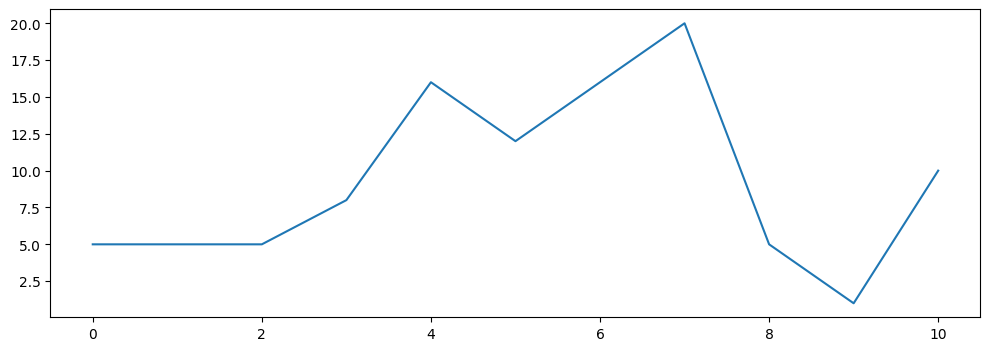

In [ ]:
import matplotlib.pyplot as plt # Импортируем библиотеку и сразу присваиваем псевдоним

# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

plt.figure(figsize=(12, 4)) # Задаем размер полотна в дюймах, на котором будем рисовать график
X = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10] # Описываем точки по координате X
Y = [5, 5, 5, 8, 16, 12, 20, 5, 1, 10] # Описываем точки по координате Y
plt.plot(X, Y) # По псевдониму вызываем функцию рисования графика plot
plt.show() # Отрисовка всего графика

К явному подходу построения графиков, мы вернемся немного позже, когда ваши приемы и техники визуализации станут достаточно сложными, чтобы оценить всю прелесть подхода.
Пока что научимся оформлять и стилизовать графики.

**Важно.** И не забываем для отображения графика вызывать метод plt.show(). Когда вы работаете в Colab, графики рисуются и без него, и может появиться иллюзия, что метод можно не вызывать. Но учитывая, что существует множество реализаций Python под разные платформы, в один прекрасный момент вы столкнетесь с тем, что ваш код работает на вашей машине и не работает у заказчика.   

### Оформление графиков

Управлять стилем графика можно с помощью двух разных механизмов.
Первый — применение свойств класса matplotlib.lines.Line2D. Они управляют маркерами, используемыми в графике, стилем линии и цветом. Полный список свойств можно найти в документации matplotlib [matplotlib.lines.Line2D](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D).

Эти свойства можно применять как аргументы ключевого слова для plt.plot.

Чаще всего вы будете использовать свойства **marker**, **linestyle** и **color**. Поэтому остановимся на них поподробнее.

Доступны следующие типы маркеров:
```
. - точка
, - пиксель
o - круг
v - угол вниз
^ - угол вверх
< - угол влево
> - угол вправо
1 - трехлучевая звезда вниз
2 - трехлучевая звезда вверх
3 - трехлучевая звезда влево
4 - трехлучевая звезда вправо
s - квадрат
p - пентагон
* - звезда
h - шестиугольник 1
H - шестиугольник 2
+ - плюс
x - x
D - бриллиант
d - тонкий бриллиант
| - вертикальная линия
_ - горизонтальная линия

```

Тип маркера мы указываем с помощью ключевого слова *marker*:

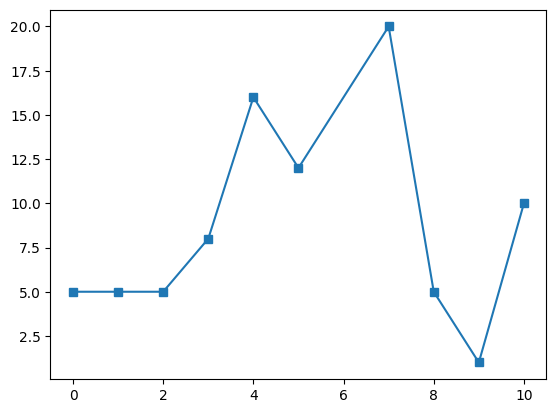

In [ ]:
plt.plot(X, Y, marker='s')
plt.show() # Отрисовка всего графика

Для линий доступны следующие стили:
```
-   - сплошной стиль (solid)
--  - штриховой стиль (dashed)
-.  - стиль штрих-пунктир (dash-dot)
:   - пунктирный стиль (dotted)
```
Чтобы задать стиль линии, используйте ключевое слово **linestyle**:


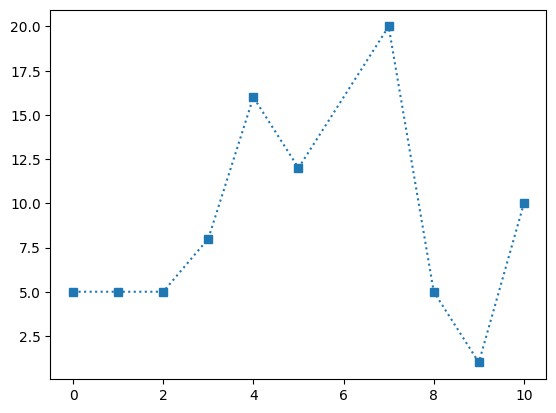

In [ ]:
plt.plot(X, Y, marker='s', linestyle=':')
plt.show() # Отрисовка всего графика

Для линий доступные следующие цвета:
```
b - синий
g - зеленый
r - красный
c - голубой
m - пурпурный
y - желтый
k - черный
w - белый
```

Задать цвет можно с помощью ключевого слова color:

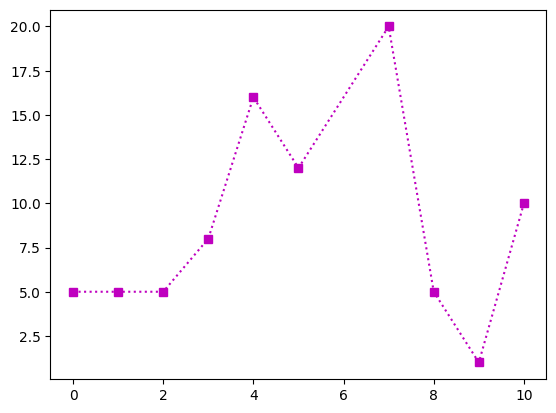

In [ ]:
plt.plot(X, Y, marker='s', linestyle=':', color='m')
plt.show()

Другой способ настройки свойств стиля — использование аргумента fmt. Это позиционный параметр, который отображается справа от параметра Y. Он состоит
из форматирующей строки, использующей условное обозначение для настроек маркера, стиля линии и цвета. Форматирующая строка имеет вид [marker][linestyle]
[color], причем все разделы опциональны.


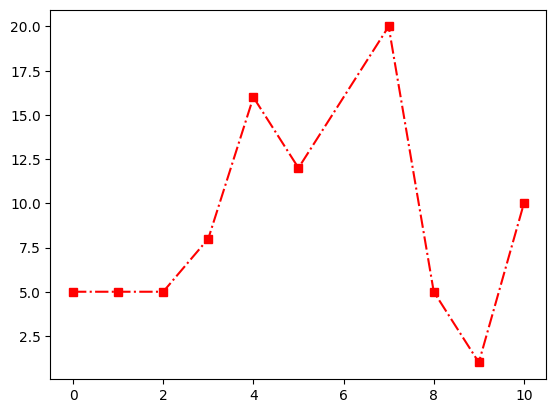

In [ ]:
fmt = 's-.r' # квадратные маркеры, пунктирный стиль линии и красный цвет
plt.plot(X, Y, fmt)
plt.show()

Можно использовать форматирующую строку и аргумент ключевого слова вместе:


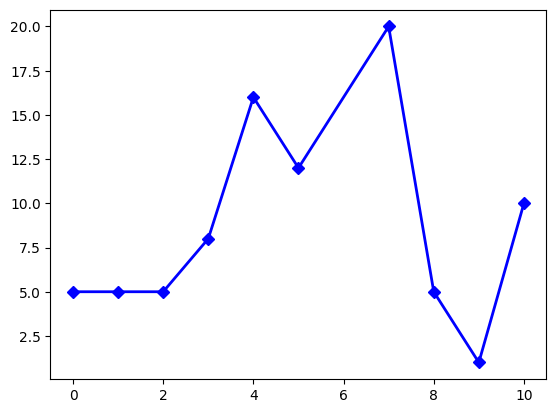

In [ ]:
fmt = 'D-b'
plt.plot(X, Y, fmt, linewidth=2)
plt.show()

### Построение графиков для множества наборов данных

Есть три подхода к отображению множества наборов данных на одном графике.

Первый — вызов функции построения графиков множество раз:

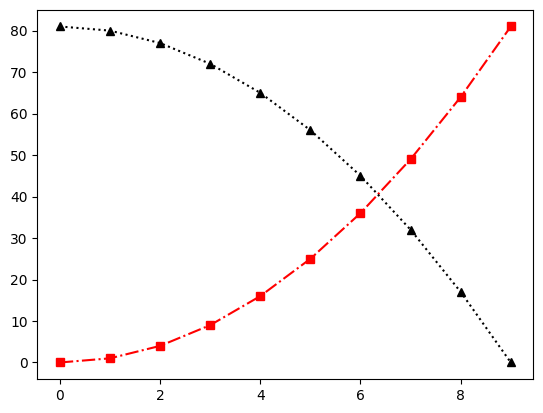

In [ ]:
X = range(10) # Определим значения по оси X
Y = [x**2 for x in X] # Определим значения по оси Y произвольной функцией
Y2 = [max(X)**2 - x**2 for x in X] # Определим значения по оси Y для другой произвольной функции

plt.plot(X, Y, 's-.r') # Определим стиль графика
plt.plot(X, Y2, '^k:') # Определим стиль второго графика
plt.show() # Отрисовка всего графика

**Важно.** plt.plot() использует текущие оси и фигуру. Это значит, что множественные вызовы будут продолжать использовать одни и те же фигуру и график.

Второй способ — передача множества наборов данных напрямую в функцию построения графиков:

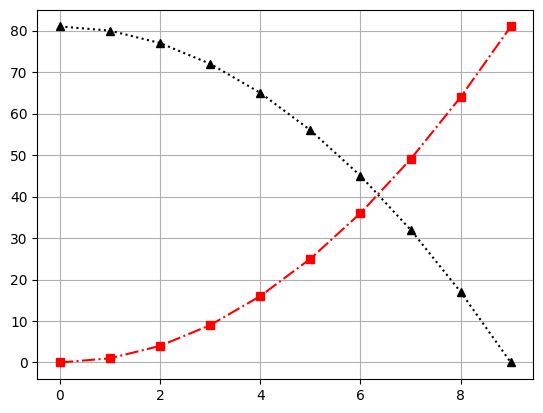

In [ ]:
plt.plot(X, Y, 's-.r', X, Y2, '^k:')      # Передаем множество наборов данных
plt.grid()                                # Отрисовка сетки на полотне
plt.show()                                # Показываем график

Третий вариант - использование маркированных данных. Здесь нам понадобится библиотека Pandas:

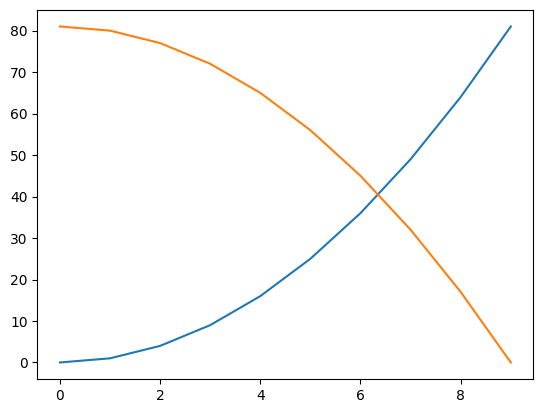

In [ ]:
import pandas as pd
data = {"X": X, "Y": Y, "Y2": Y2}       # Мы маркируем данные X, Y, Y2
data_df = pd.DataFrame(data)            # Будем строить графики по DataFrame

plt.plot('X', 'Y', 'Y2', data=data_df)  # Используем маркированные данные
plt.show()                              # Показываем график

Matplotlib предлагает удобные функции для добавления меток, названия и легенды
графика. Можно создать маркированную версию графика:


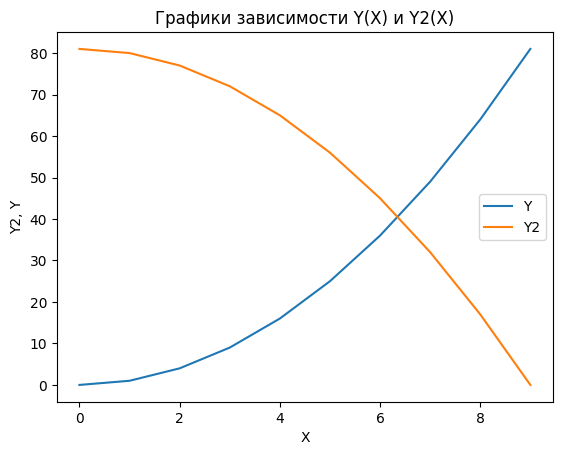

In [ ]:
plt.plot('X', 'Y', 'Y2', data=data_df)
plt.xlabel('X') # Подпись оси x
plt.ylabel('Y2, Y') # Подпись оси y
plt.title("Графики зависимости Y(X) и Y2(X)") # Заголовок графика
plt.legend(['Y', 'Y2']) # Добавляем легенду
plt.show()

### Явный подход построения графиков

Явный подход, который еще принято называть объектно-ориентированным стилем, дает возможность напрямую обращаться к фигурам и стилям, что дает вам больше контроля. Подход заключается в вызове функции `plt.subplots()`, которая возвращает фигуру и указанное количество осей.

Теперь можно строить графики по осям почти так же, как при использовании
неявного построения:

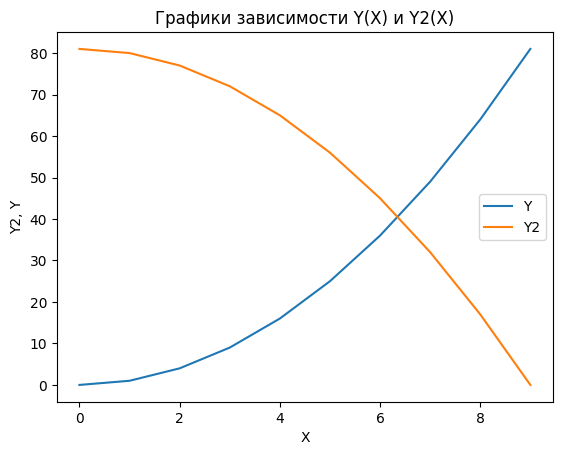

In [ ]:
fig, ax = plt.subplots()
ax.plot('X', 'Y', 'Y2', data=data_df)
ax.set_xlabel('X')
ax.set_ylabel('Y2, Y')
ax.set_title("Графики зависимости Y(X) и Y2(X)")
ax.legend(['Y', 'Y2'])
plt.show()

Мы получили точно такой же график, как и в предыдущем примере.

Теперь же мы можем тонко управлять осями, поэтому создадим одну фигуру и две оси под маркированные графики Y и Y2:

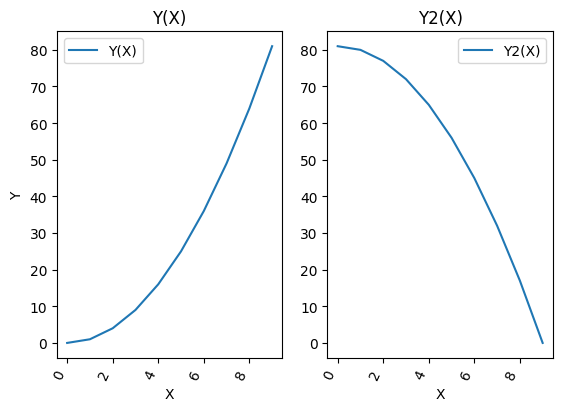

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)    # Создание одной фигуры и двух осей
ax1.plot('X', 'Y', data=data_df)        # График Y(X) на первой оси
ax1.set_xlabel('X')                     # Метка оси x первой оси
ax1.set_ylabel('Y')                     # Метка оси y первой оси
ax1.set_title("Y(X)")                   # Установка заголовка первой оси
ax1.legend(['Y(X)'])                    # Установка легенды первой оси
ax2.plot('X', 'Y2', data=data_df )      # Построение второй оси
ax2.set_xlabel('X')                     # Установка метки x для второй оси
ax2.set_title("Y2(X)")                  # Установка заголовка для второй оси
ax2.legend(['Y2(X)'])                   # Установка легенды для второй оси
fig.autofmt_xdate(rotation=65)          # Поворот меток X
plt.show()                              # Используйте для фактического отображения графика

Неявный стиль построения графиков отлично подходит для интерактивного изучения данных. Явный стиль дает вам гораздо больше контроля и рекомендован для
построения графика в продакшен-коде.

### Библиотека Seaborn

**Seaborn** — это библиотека для создания статистических графиков, которая строится
поверх matplotlib. Она разработана для упрощения создания красивых статистических графиков и известна наличием стиля по умолчанию, который выглядит
лучше, чем предлагаемые другими библиотеками.

По соглашению между программистами, эту библиотеку принято импортировать с псевдонимом *sns*:

In [ ]:
import seaborn as sns

Seaborn содержит наборы выборочных данных, используемых в предоставленной
документации и руководствах. Эти наборы данных также удобный источник для
изучения свойств Seaborn. Их можно загрузить как датафреймы Pandas с помощью функции `sns.load_dataset()` с именем набора данных в качестве аргумента.

Доступные наборы данных можно найти по ссылке: https://github.com/mwaskom/seaborn-data.

Ниже показано, как загрузить набор данных автомобильных аварий и выбрать
столбцы для работы:


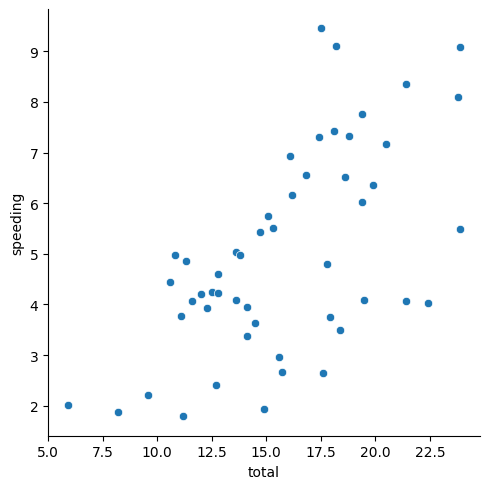

In [ ]:
car_crashes = sns.load_dataset('car_crashes')
# Отбираем колонки: всего аварий, не отвлекался, пьяный за рулем, превышение скорости
car_crashes = car_crashes[['total', 'not_distracted', 'alcohol', 'speeding']]
sns.relplot(data=car_crashes, x='total', y='speeding')



В этом примере функция Seaborn sns.relplot() используется для построения
графика, отображающего зависимость между двумя столбцами.

Использование тем Seaborn — простой способ контролировать внешний вид
диаграмм. Применить одну из тем по умолчанию можно с помощью следующей
функции:


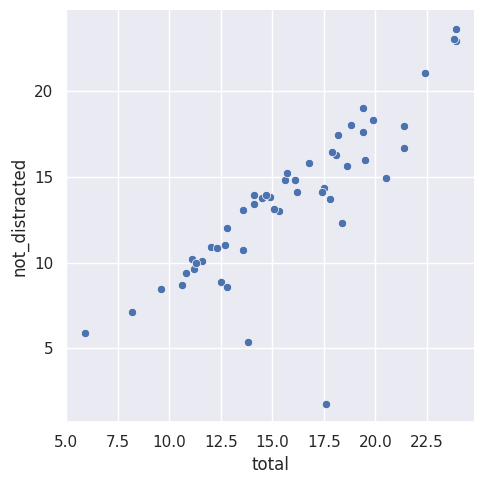

In [ ]:
sns.set_theme()
sns.relplot(data=car_crashes,
 x='total',
 y='not_distracted')

После установки темы Seaborn она применяется к любым последующим графикам,
даже созданным напрямую с помощью matplotlib. Seaborn объединяет параметры
matplotlib в две группы: одна имеет дело с эстетическим видом графика, а вторая - с элементами масштаба.

В Seaborn доступны пять предустановленных стилей: **darkgrid**, **whitegrid**, **dark**, **white** и **ticks**. Стиль можно установить с помощью функции sns.set_style(). Например, стиль dark применяется следующим образом:


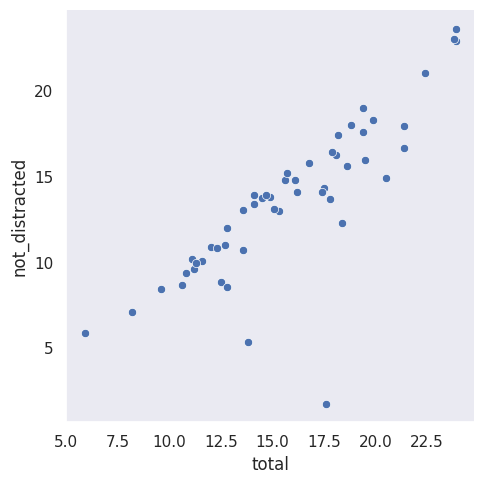

In [ ]:
sns.set_style('dark')
sns.relplot(data=car_crashes,
 x='total',
 y='not_distracted')

Темы, доступные для настройки масштаба элементов фигуры, основаны на целевом
представлении. К ним относятся **paper**, **notebook**, **talk** и **poster**.

Установить тему можно с помощью функции sns.set_context(). При перепостроении графика масштаб скорректируется:

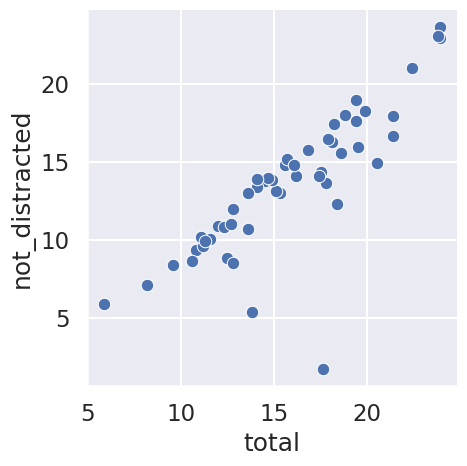

In [ ]:
sns.set_context('talk')
sns.set_style('darkgrid')
sns.relplot(data=car_crashes,
 x='total',
 y='not_distracted')

Seaborn предлагает множество типов графиков. Один из наиболее полезных типов для
поиска корреляции в данных — sns.pairplot(). Он создает сетку осей, отображающих взаимосвязь между всеми столбцами датафрейма. Создать парный график
с помощью набора данных можно так:

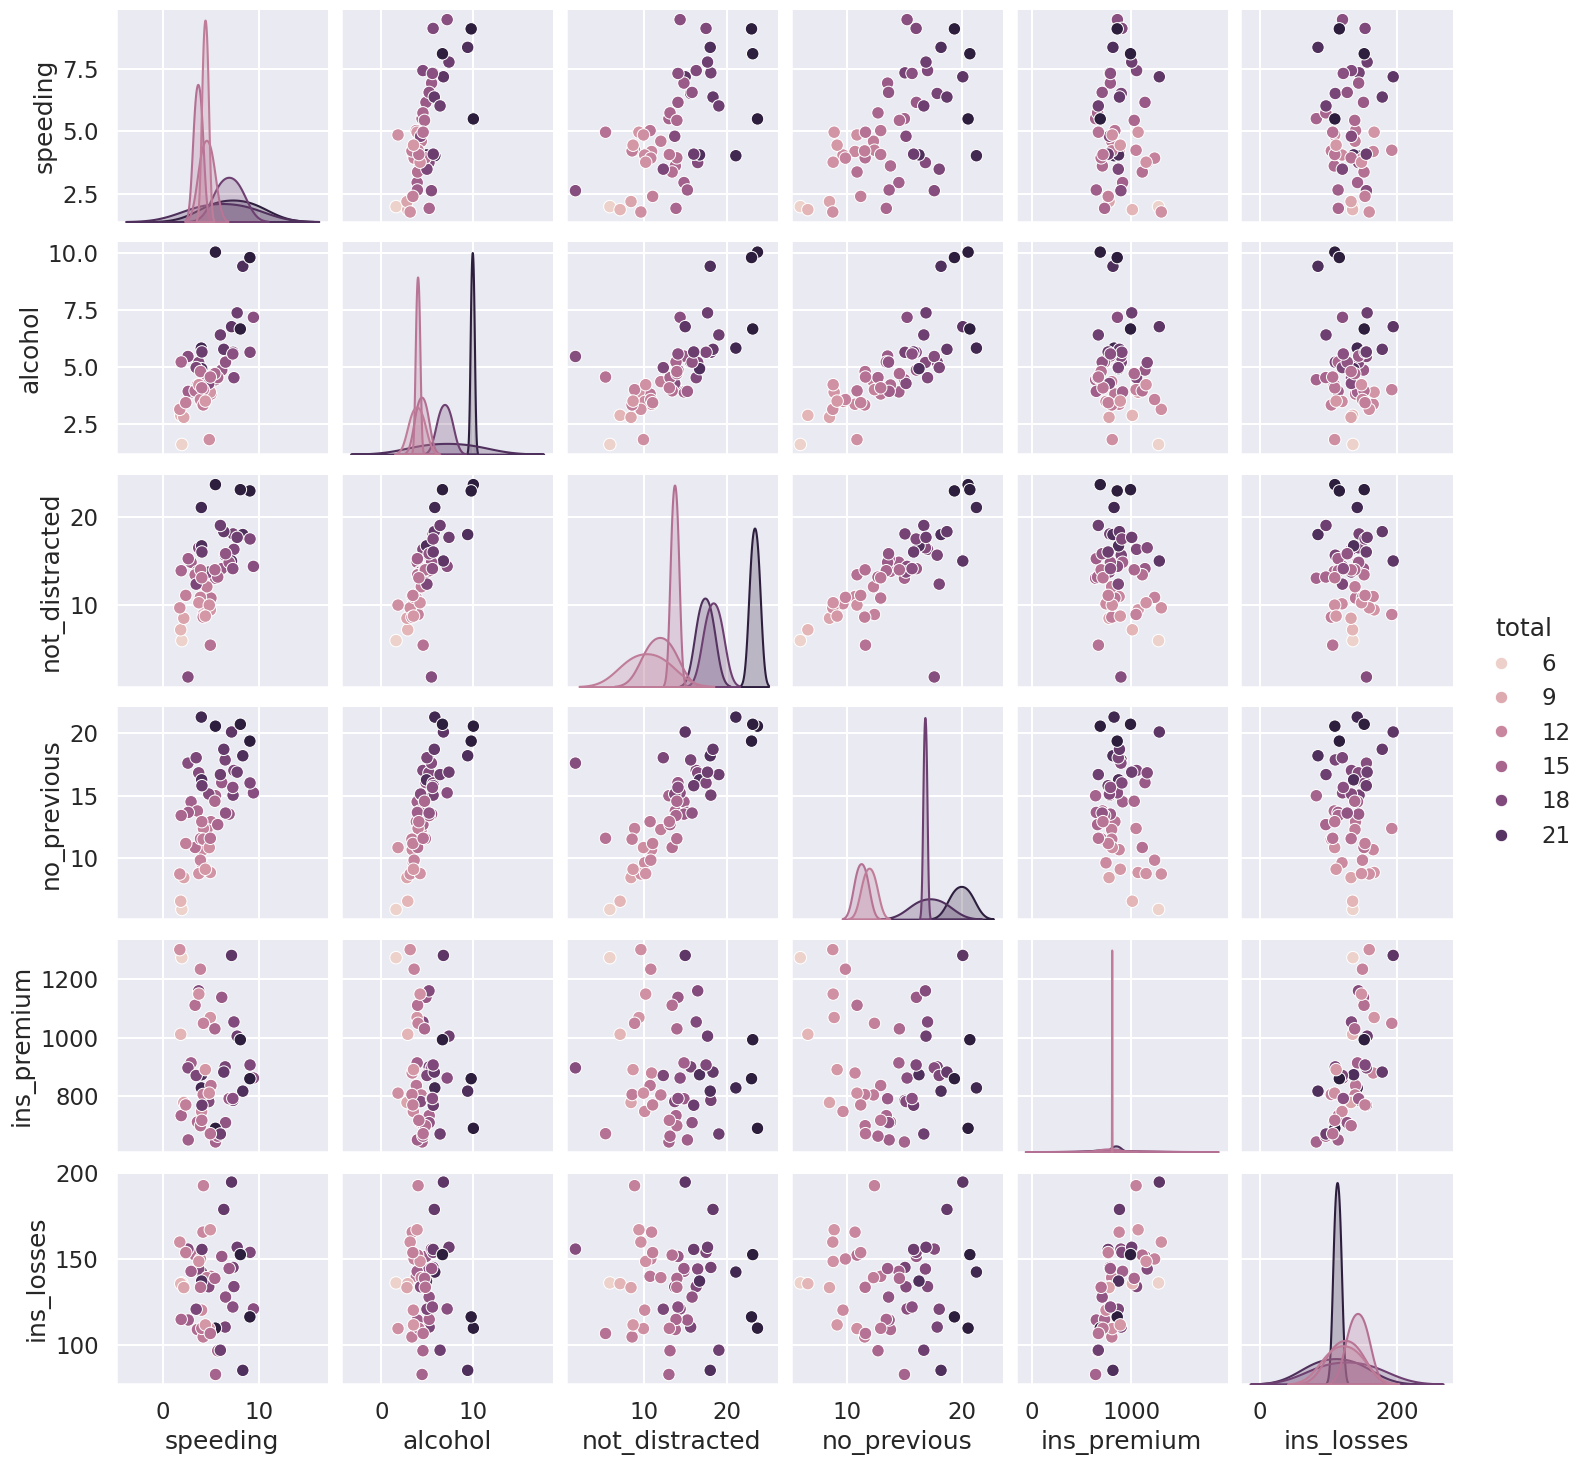

In [ ]:
df = sns.load_dataset('car_crashes')
sns.pairplot(df, hue='total')

### Библиотеки Plotly и Bokeh

matplotlib и Seaborn — отличные инструменты для создания готовых к публикации
статичных графиков. Оба могут быть расширены для создания интерактивных презентаций данных. Но библиотеки Plotly и Bokeh предназначены специально
для создания высококачественных интерактивных графиков.

Plotly предлагает много типов графиков, но его отличительная черта в том, что он упрощает построение 3D-графиков. Пакет plotly – библиотека с открытым исходным кодом, построенная на plotly.js, которая, в свою очередь, базируется на d3.js.

Преимущество динамических графиков заключается в том, что вы можете поворачивать и масштабировать график:

In [ ]:
import plotly.express as px
iris = px.data.iris() # Используем встроенный датасет Ирис
print(iris.columns)   # Выведем доступные колонки
fig = px.scatter_3d(iris,
    x='sepal_length',
    y='petal_width',
    z='petal_length',
    color='species')
fig.show()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id'],
      dtype='object')


Мы видим, что набор данных состоит из длины и ширины двух типов лепестков Ириса: sepal и petal. Целевая переменная — это сорт Ириса (species): 0 — Setosa, 1 — Versicolor, 2 — Virginica. Соответственно, на графике мы получили зависимость между размерами лепестков и сортами Ирисов.

Мы не будем сейчас останавливаться на библиотеке Plotly, потому что на практической части урока вас ждет погружение в библиотеку на конкретном практическом примере.

Bokeh — это альтернатива Plotly для простого создания интерактивных графиков.
Одно из преимуществ Bokeh — в использовании специального объекта данных ColumnDataSource. Он обеспечивает повышенную производительность, позволяя
обновлять и прикреплять данные без перезагрузки состояния. Также источник данных может быть общим для фигур. Поэтому взаимодействие с данными в одной
фигуре изменяет их в другой.

In [ ]:
# Устанавливаем необходимую версию Bokeh и переустановим зависимую библиотеку
!pip install bokeh==2.4.3 holoviews

INFO: pip is looking at multiple versions of holoviews to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is still looking at multiple versions of holoviews to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/ba

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
output_notebook()           # Необходимо выполнить для отображения графика в ячейке блокнота

X = [x for x in range(100)] # Задаем ось Х
Y = [y*2 for y in X]        # Произвольная функция Y
Y1 = [y**2 for y in X]      # Произвольная функция Y1

data={'x': X, 'y': Y, 'y1': Y1} # Маркированные данные
TOOLS = "box_select" # Выбор интерактивных инструментов (теперь на графике можно выделять участки)
source = ColumnDataSource(data=data) # Создание ColumnDataSource
left = figure(tools=TOOLS,  title='Y(X)') # Создание рисунка выбранными инструментами
left.circle('x', 'y', source=source) # Создание кругового графика на первой фигуре
right = figure(tools=TOOLS, title='Y1(X)') # Создание рисунка выбранными инструментами
right.circle('x', 'y1', source=source) # Создание кругового графика на второй фигуре
p = gridplot([[left, right]]) # Размещение фигур на сетке
show(p) # Вывод сетки



Выводимые фигуры позволяют осуществлять отбор поперечных осей с учетом
выбранного инструмента. Это значит, что при выборе участка одного графика соответствующие точки во втором тоже будут выбраны (инструмент выделение в правом верхнем углу графика).

Существует множество других библиотек визуализации помимо описанных выше, вот некоторые из них:
* geoplotlib — позволяет визуализировать карты и географические данные;
* ggplot — основанный на языке R пакет ggplot2;
* pygal — упрощает создание простых графиков;
* folium — позволяет создавать интерактивные карты;
* missingno — позволяет визуализировать недостающие данные.

Однако, если вы опросите специалистов в Data Science, какие библиотеки визуализации они используют, то в 90% случаях услышите ответ: matplotlib, plotly и seaborn.

На этом знакомство с теоретической частью урока завершено и пора перейти к его [практической части](https://colab.research.google.com/drive/1jukOs54u301WtyQS-SbRxWxDstTCjEBq).